In [1]:
import sys
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import scipy as sp

In [26]:
def loss_score(predict, real):
    f = (real - predict)/real
    n = len(f)
    f = f.replace([np.nan, -np.nan], 0)
    score = 1 - np.abs(f).sum()/n
    return score 
# from sklearn.metrics import r2_score
# loss_score = r2_score

In [3]:
if sys.argv[1] == 'test':
    is_train = False
else:
    is_train = True

In [45]:
if is_train:
    train_path = '../dataset/fetures/train.csv'
    predict_path = '../dataset/fetures/train_predict.csv'
    feture_path = '../dataset/fetures/train_feture.csv'
else:
    train_path = '../dataset/fetures/test.csv'
    predict_path = '../dataset/fetures/test_predict.csv'
    feture_path = '../dataset/fetures/test_feture.csv'

In [53]:
train = pd.read_csv(train_path, parse_dates=['record_date'])

In [6]:
predict = pd.read_csv(predict_path, parse_dates=['predict_date'], index_col=['predict_date'])

# 移动划窗规则

In [7]:
days = len(predict)

In [8]:
avg_df = train.groupby('record_date')[['power_consumption']].sum()

In [9]:
avg_df.index = avg_df.index + timedelta(days)

In [10]:
avg_df.index.name = 'predict_date'

In [11]:
avg_df['predict_power_consumption'] = avg_df.power_consumption.astype(int)

In [12]:
rule_predict = pd.DataFrame(avg_df.predict_power_consumption, index=predict.index)

In [13]:
if is_train:
    print('move windows score', loss_score( rule_predict, predict))

move windows score predict_power_consumption    0.906305
dtype: float64


# 平均值

In [73]:
train.record_date.unique().shape

(547,)

In [27]:
def avg_score(month, year='2016'):
    df = train.set_index('record_date').loc['{}/{}/1'.format(year, month):]
    days = df.index.unique().shape[0]
    mean_consumption = np.int64(df.power_consumption.sum()/days)

    predict['avg'] = mean_consumption
#     predict['avg'] = df.power_consumption.mean()

    if is_train:
        loss = loss_score(predict.avg, predict.predict_power_consumption)
        print('from {}-{} '.format(year, month), 'avg {} score', mean_consumption, loss_score(predict.predict_power_consumption, predict.avg))

    

# 年平均耗电量

In [68]:
df = train.set_index('record_date').loc['2015/1/1':'2016/1/1']

In [70]:
 df.groupby(df.index)[['power_consumption']].sum().resample('M').mean().mean()

power_consumption    3.657300e+06
dtype: float64

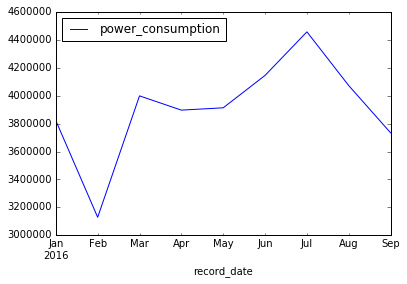

In [73]:
df = train.set_index('record_date').loc['2016/1/1':'2017/1/1']
df.groupby(df.index)[['power_consumption']].sum().resample('M').mean().plot()

In [54]:
df = train.set_index('record_date').loc['2016/6/1':]

In [58]:
df = train.set_index('record_date').loc['2015/10/1':'2015/10/31']

In [66]:
 df.groupby(df.index)[['power_consumption']].sum().iloc[30:].resample('M').mean()

,power_consumption
record_date,
2015-10-31,3232390


In [64]:
%matplotlib inline

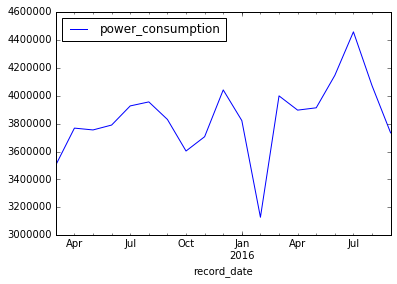

In [65]:
train.groupby(train.record_date)[['power_consumption']].sum().iloc[30:].resample('M').mean().plot()

In [61]:
 df.groupby(df.index)[['power_consumption']].sum().iloc[30:].resample('M').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [39]:
mean = df.groupby(df.index)[['power_consumption']].sum().mean()['power_consumption']

In [47]:
train.groupby('record_date').sum().resample('M').mean()

,user_id,power_consumption
record_date,,
2015-02-28,1.057773e+06,3.384961e+06
2015-03-31,1.057773e+06,3.677475e+06
2015-04-30,1.057726e+06,3.795361e+06
2015-05-31,1.057785e+06,3.794985e+06
2015-06-30,1.057699e+06,3.829548e+06
2015-07-31,1.057709e+06,3.943190e+06
2015-08-31,1.057785e+06,3.968945e+06
2015-09-30,1.057690e+06,3.886805e+06
2015-10-31,1.057771e+06,3.784714e+06


In [40]:
mean

3828320.3964290856

In [28]:
for year in [2015, 2016]:
    for month in range(1, 13):
        if not(year == 2016 and month > 6):
            avg_score(month, year)

from 2015-1  avg {} score 3807220 0.8916142224510273
from 2015-2  avg {} score 3807592 0.8916672897543736
from 2015-3  avg {} score 3833174 0.8950576059104702
from 2015-4  avg {} score 3838170 0.895675254432281
from 2015-5  avg {} score 3840505 0.8959610893562854
from 2015-6  avg {} score 3844146 0.896389075300696
from 2015-7  avg {} score 3847113 0.8967372360159085
from 2015-8  avg {} score 3842905 0.8962432914909311
from 2015-9  avg {} score 3836162 0.8954272015487944
from 2015-10  avg {} score 3832105 0.8949229062038386
from 2015-11  avg {} score 3839154 0.8957967154946795
from 2015-12  avg {} score 3852815 0.8974048280565498
from 2016-1  avg {} score 3833563 0.8951057552328803
from 2016-2  avg {} score 3832693 0.8949980555731167
from 2016-3  avg {} score 3880576 0.9005881332184124
from 2016-4  avg {} score 3865134 0.8988404159270837
from 2016-5  avg {} score 3843646 0.896330350198065
from 2016-6  avg {} score 3828320 0.8944321416500551


# 选择2015-1月到至今的平均值

In [30]:
avg_score(6, 2016) if is_train else avg_score(9, 2016)

from 2016-6  avg {} score 3828320 0.8944321416500551


In [78]:
if not is_train:
    predict['predict_power_consumption'] = predict.avg
    predict.index = predict.index.map(lambda x:x.strftime('%Y%m%d'))
    predict.index.name = 'predict_date'
    predict.to_csv('Tianchi_power_predict_table.csv', columns=['predict_power_consumption'])